In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


**Численные признаки:** was_married, children, salary, sex, age, home_cost, drive_info, happyness
**Категориальные признаки:** profession

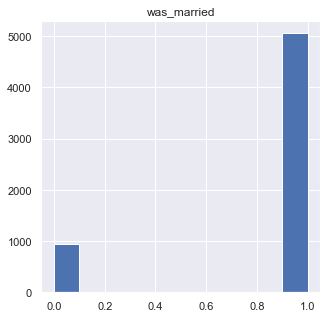

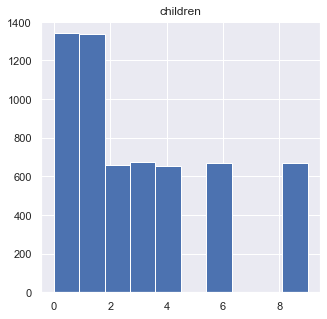

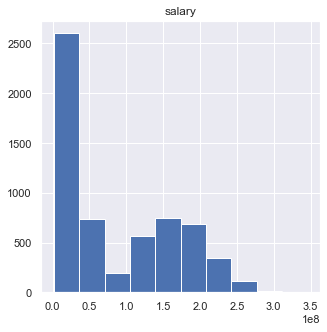

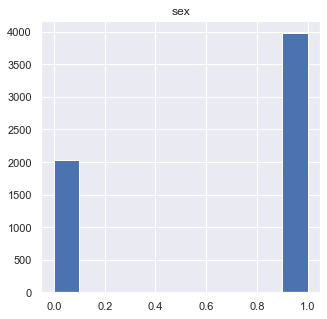

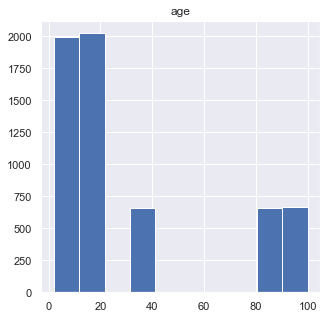

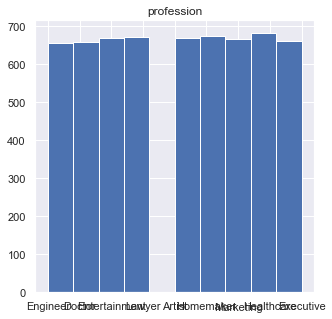

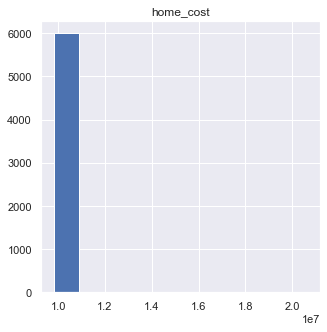

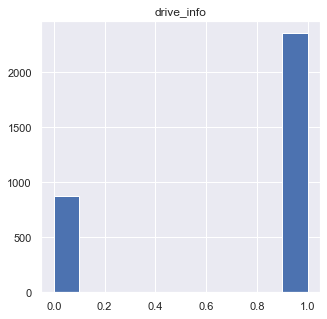

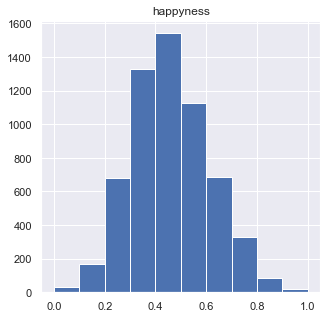

In [4]:
for i in list(data.columns):
    fig = plt.subplots(figsize=(5, 5))
    data[i].hist().set_title(i)

Нормальное распределение имеет признак **happyness**

Судя по графикам, home_cost может быть бессмысленным признаком, но это может быть не так из-за выбросов данных.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [5]:
data.duplicated().sum()

0

В датасете нет дублирующихся значений

In [6]:
data.isnull().sum()

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

Есть пропущенные значения в признаке drive_info

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

was_married    0
children       0
salary         0
sex            0
age            0
profession     0
home_cost      0
drive_info     0
happyness      0
dtype: int64

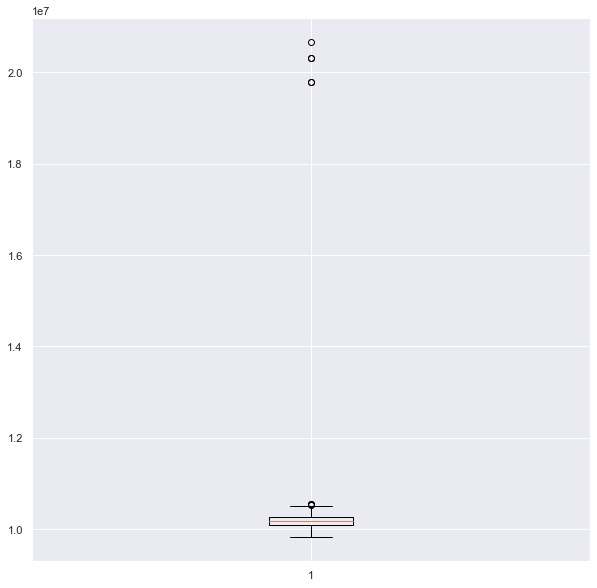

In [9]:
plt.figure(figsize=(10, 10))
plt.boxplot(data['home_cost']);

In [10]:
q25 = data.home_cost.quantile(0.25)
q75 = data.home_cost.quantile(0.75)
iqr = q75 - q25
boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
is_outlier = (data.home_cost < boundaries[0]) | (data.home_cost > boundaries[1])
is_outlier.sum()

8

8 выбросов по признаку home_cost

In [11]:
data.loc[data['home_cost'] < boundaries[0]] = np.nan
data.loc[data['home_cost'] > boundaries[1]] = np.nan
data.dropna(inplace=True)

In [12]:
q25 = data.home_cost.quantile(0.25)
q75 = data.home_cost.quantile(0.75)
iqr = q75 - q25
boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
is_outlier = (data.home_cost < boundaries[0]) | (data.home_cost > boundaries[1])
is_outlier.sum()

0

Почистили. 0 выбросов по признаку home_cost.


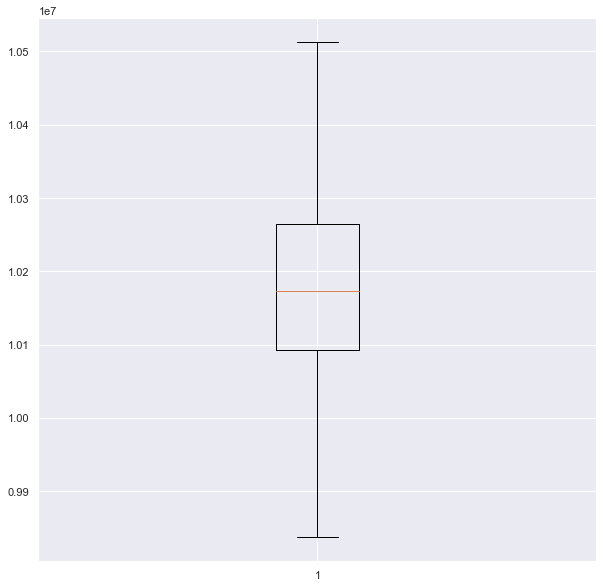

In [13]:
plt.figure(figsize=(10, 10))
plt.boxplot(data['home_cost']);

# Проверка гипотез

Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

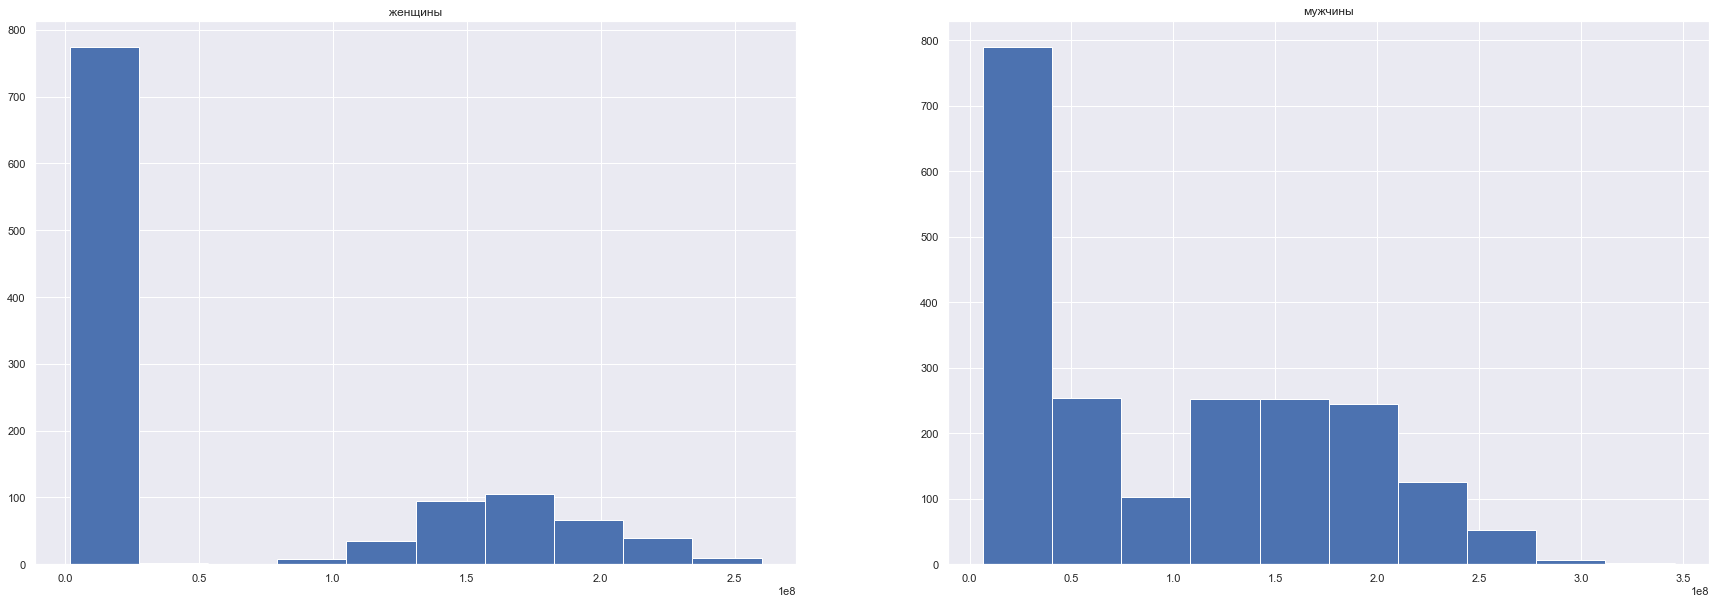

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].hist(data[data['sex'] == 0]['salary'])
axs[0].set_title('женщины')
axs[1].hist(data[data['sex'] == 1]['salary'])
axs[1].set_title('мужчины');

In [15]:
print('средняя зарплата женщин:', data[data['sex'] == 0]['salary'].mean())
print('средняя зарплата мужчин:', data[data['sex'] == 1]['salary'].mean())

средняя зарплата женщин: 55152883.981080815
средняя зарплата мужчин: 98631162.32862672


Нет, гипотеза не верна, у мужчин средняя зарплата выше, чем у женщин

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

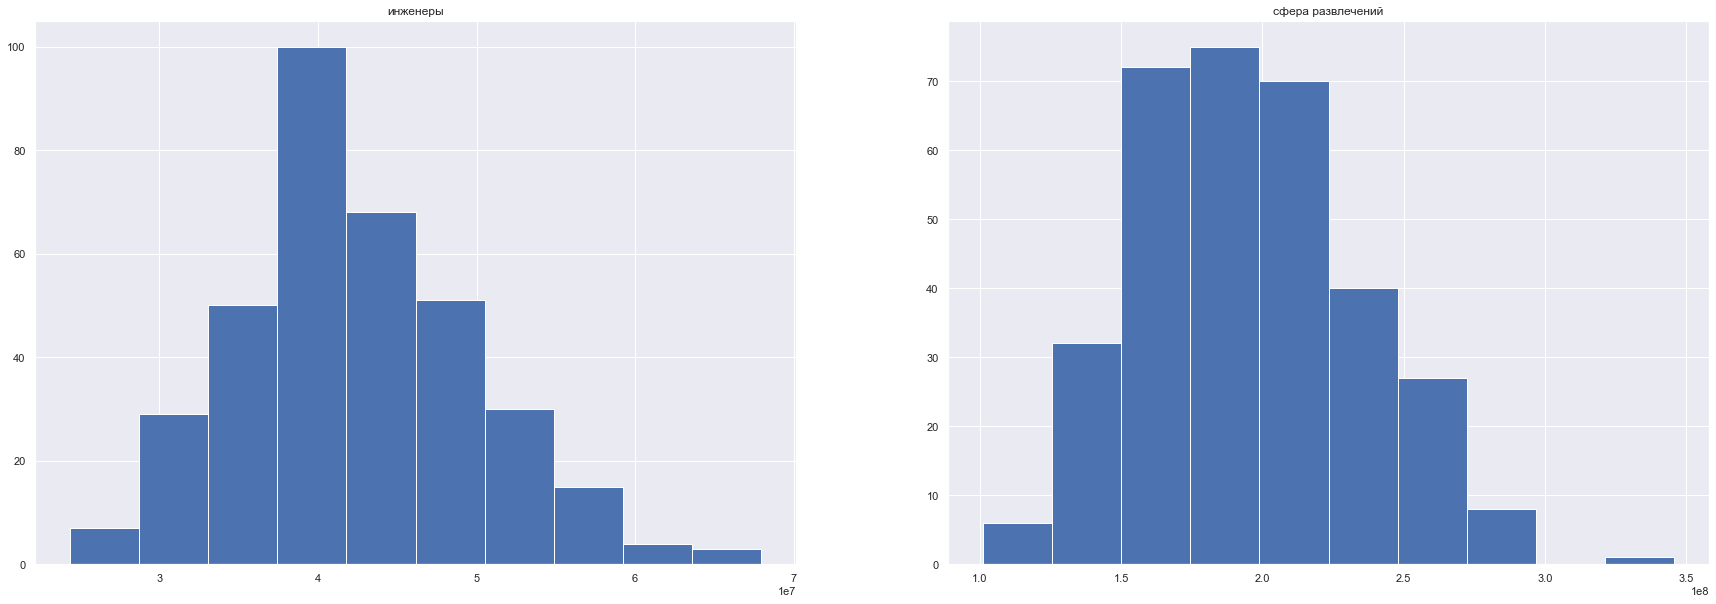

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].hist(data[data['profession'] == 'Engineer']['salary'])
axs[0].set_title('инженеры')
axs[1].hist(data[data['profession'] == 'Entertainment']['salary'])
axs[1].set_title('сфера развлечений');

In [17]:
print('средняя зарплата инженеров:', data[data['profession'] == 'Engineer']['salary'].mean())
print('средняя зарплата работников сферы развлечений:', data[data['profession'] == 'Entertainment']['salary'].mean())

средняя зарплата инженеров: 42286309.9349752
средняя зарплата работников сферы развлечений: 195255543.81107616


Да, гипотеза верна, инженеры зарабатывают больше работников сферы развлечений

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

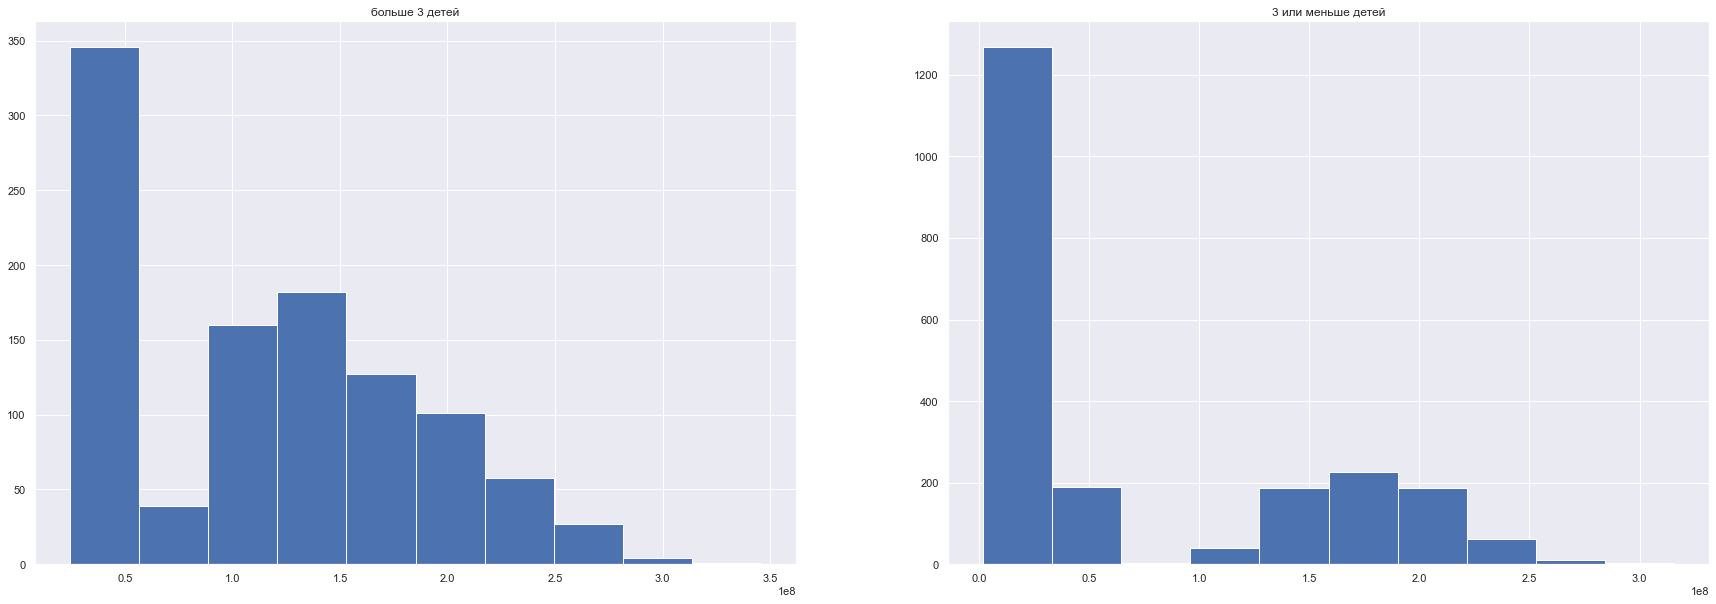

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].hist(data[data['children'] > 3]['salary'])
axs[0].set_title('больше 3 детей')
axs[1].hist(data[data['children'] <= 3]['salary'])
axs[1].set_title('3 или меньше детей');

In [19]:
print('средняя зарплата тех, кто имеет больше 3 детей:', data[data['children'] > 3]['salary'].mean())
print('средняя зарплата тех, кто имеет 3 или меньше детей:', data[data['children'] <= 3]['salary'].mean())

средняя зарплата тех, кто имеет больше 3 детей: 117532512.4314049
средняя зарплата тех, кто имеет 3 или меньше детей: 66850402.87131707


Да, гипотеза верна. Те, у кого больше 3 детей, в среднем зарабатывают больше.

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

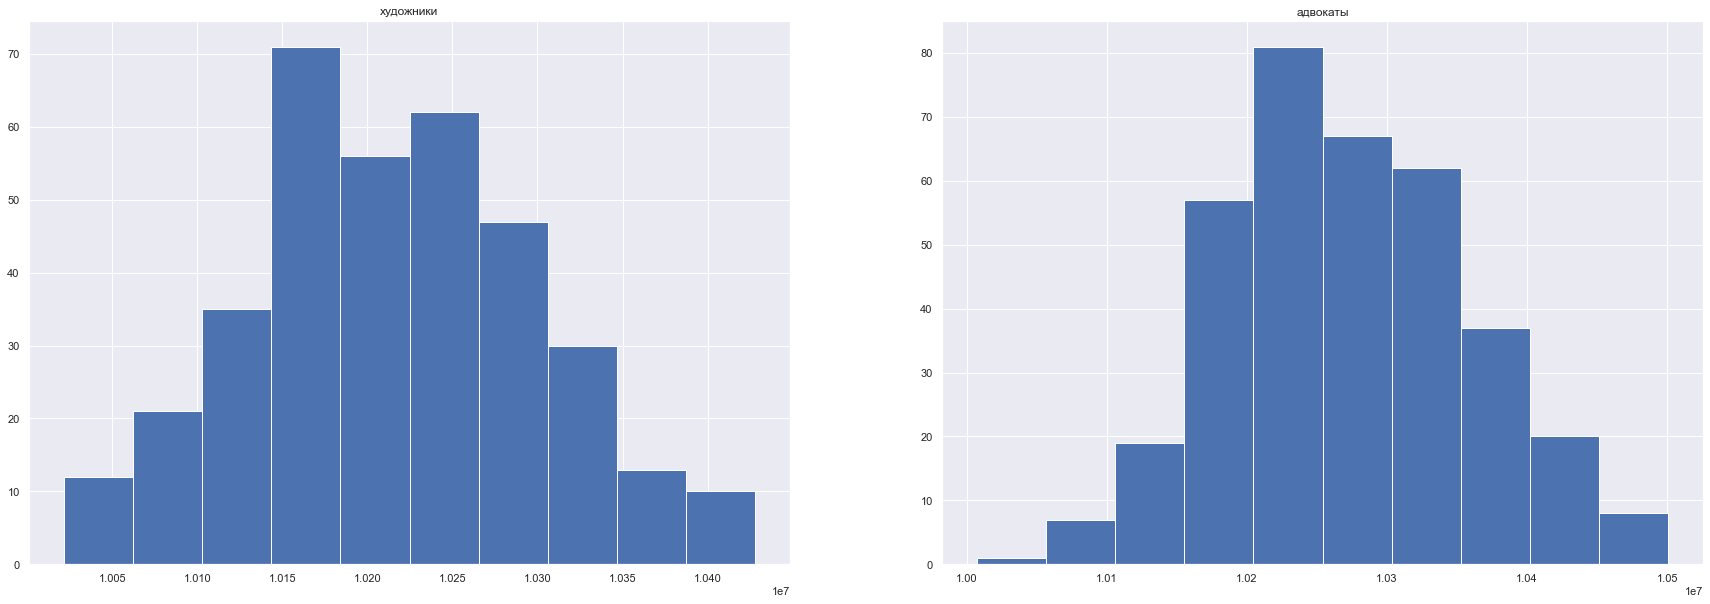

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].hist(data[data['profession'] == 'Artist']['home_cost'])
axs[0].set_title('художники')
axs[1].hist(data[data['profession'] == 'Lawyer']['home_cost'])
axs[1].set_title('адвокаты');

In [21]:
print('средняя стоимость недвижимости художников:', data[data['profession'] == 'Artist']['home_cost'].mean())
print('средняя стоимость недвижимости адвокатов:', data[data['profession'] == 'Lawyer']['home_cost'].mean())

средняя стоимость недвижимости художников: 10216333.745848315
средняя стоимость недвижимости адвокатов: 10272285.133611755


Нет, в среднем недвижимость имеет примерно одинаковую стоимость

<div class="alert alert-warning">
    
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


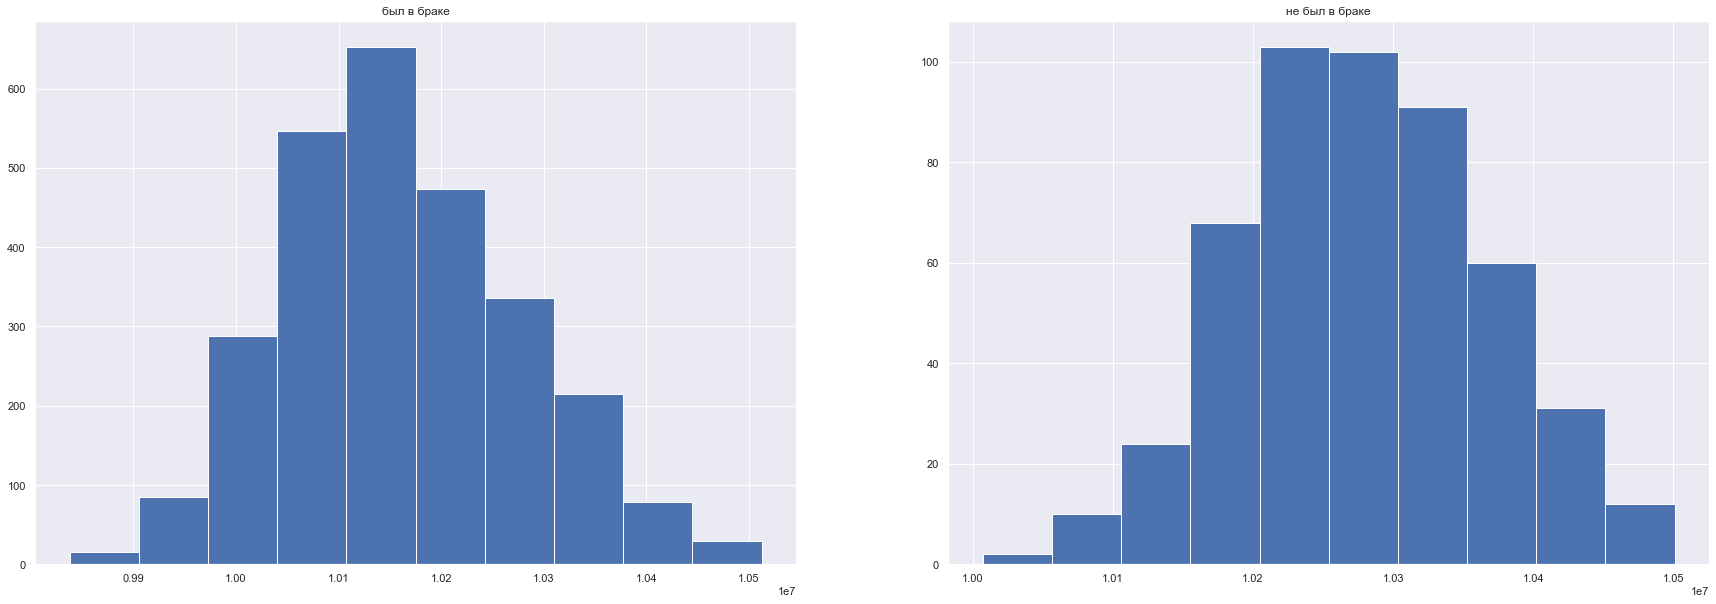

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].hist(data[data['was_married'] == 1]['home_cost'])
axs[0].set_title('был в браке')
axs[1].hist(data[data['was_married'] == 0]['home_cost'])
axs[1].set_title('не был в браке');

In [23]:
print('средняя стоимость недвижимости тех, кто был в браке:', data[data['was_married'] == 1]['home_cost'].mean())
print('средняя стоимость недвижимости тех, кто не был в браке:', data[data['was_married'] == 0]['home_cost'].mean())

средняя стоимость недвижимости тех, кто был в браке: 10161649.29269273
средняя стоимость недвижимости тех, кто не был в браке: 10278708.376968108


Нет, гипотеза не верна. Средняя стоимость недвижимости тех, кто был в браке, и тех, кто не был, примерно одинакова.

<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [24]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |

In [25]:
data.shape

(3222, 9)

In [26]:
data[data['sex'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 5 to 497
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  1137 non-null   float64
 1   children     1137 non-null   float64
 2   salary       1137 non-null   float64
 3   sex          1137 non-null   float64
 4   age          1137 non-null   float64
 5   profession   1137 non-null   object 
 6   home_cost    1137 non-null   float64
 7   drive_info   1137 non-null   float64
 8   happyness    1137 non-null   float64
dtypes: float64(8), object(1)
memory usage: 88.8+ KB


In [27]:
data[data['sex'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 1 to 495
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  2085 non-null   float64
 1   children     2085 non-null   float64
 2   salary       2085 non-null   float64
 3   sex          2085 non-null   float64
 4   age          2085 non-null   float64
 5   profession   2085 non-null   object 
 6   home_cost    2085 non-null   float64
 7   drive_info   2085 non-null   float64
 8   happyness    2085 non-null   float64
dtypes: float64(8), object(1)
memory usage: 162.9+ KB


In [28]:
data.groupby('sex', as_index=True).agg({'was_married': 'sum'})

,was_married
sex,
0.0,778.0
1.0,1941.0


Да, гипотеза верна, мужчины в среднем чаще бывают в браке, чем женщины.